In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


## Data Loading

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

## Overview of the data

In [ ]:
# shape of the data (samples,features)
train_data.shape

(100000, 76)

In [5]:
test_data.shape

(10000, 75)

In [6]:
# First five samples of the dataframe
train_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [7]:
# Features' name of the data
columns = train_data.drop(columns='target').columns.to_list()
print(columns)

['MachineID', 'ProductName', 'EngineVersion', 'AppVersion', 'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber', 'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'PowerPlatformRole', 'InternalBatteryNumberOfCharges', 'NumericOSVersion', 'OSArchitecture',

In [8]:
# Quick information about features of the data
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [9]:
# Descriptive stats of numerical features
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBetaUser,100000.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
RealTimeProtectionState,99934.0,6.848430e+00,1.015166e+00,0.0,7.0,7.0,7.000000e+00,8.000000e+00
IsPassiveModeEnabled,100000.0,1.762000e-02,1.315664e-01,0.0,0.0,0.0,0.000000e+00,1.000000e+00
AntivirusConfigID,99924.0,4.797571e+04,1.380332e+04,39.0,49480.0,53447.0,5.344700e+04,7.049000e+04
NumAntivirusProductsInstalled,99924.0,1.326528e+00,5.206814e-01,1.0,1.0,1.0,2.000000e+00,5.000000e+00
NumAntivirusProductsEnabled,99924.0,1.018264e+00,1.552909e-01,0.0,1.0,1.0,1.000000e+00,4.000000e+00
HasTpm,100000.0,9.967800e-01,5.665389e-02,0.0,1.0,1.0,1.000000e+00,1.000000e+00
CountryID,100000.0,1.080788e+02,6.306215e+01,1.0,51.0,97.0,1.620000e+02,2.220000e+02
CityID,99377.0,8.102994e+04,4.894403e+04,7.0,36694.0,82373.0,1.228350e+05,1.679570e+05
GeoRegionID,100000.0,1.697416e+02,8.918893e+01,1.0,89.0,181.0,2.670000e+02,2.960000e+02


In [10]:
# IsFlightsDisabled, AutoSampleSubmissionEnabled, IsBetaUser  
# 0 (zero) throughput features

In [11]:
train_data.isnull().sum().sum() # Total number of null values in the training dataset

6533

In [12]:
# Percentage of null values in each columns
col_perc = (train_data.isnull().sum().sort_values(ascending=False)/train_data.shape[0])*100
print(col_perc)

SMode                             0.981
CityID                            0.623
RegionIdentifier                  0.559
IsGamer                           0.559
InternalBatteryNumberOfCharges    0.515
                                  ...  
DeviceFamily                      0.000
ProductName                       0.000
HasOpticalDiskDrive               0.000
PowerPlatformRole                 0.000
target                            0.000
Length: 76, dtype: float64


In [13]:
# Percentage of null values
perc = np.sum(col_perc)
print(f"{round(perc,3)} % values are null")

6.533 % values are null


In [14]:
# No of duplicate samples in dataset
train_data.duplicated().sum()

165

In [15]:
# Remove duplicate values from train dataset
train_data.drop_duplicates(inplace=True)
train_data.duplicated().sum()

0

In [16]:
# Numerical features 
num_cols = train_data.drop(columns='target').select_dtypes(include='number').columns.to_list()
print(len(num_cols))

47


In [17]:
# Categorical features
cat_cols = train_data.select_dtypes(exclude='number').columns.to_list()
len(cat_cols)

28

In [18]:
# Splitting independent and dependent features
X,y = train_data.drop(columns='target'),train_data['target']

In [19]:
# Shape of exploratory dataset and shape of  predictive dataset
X.shape,y.shape

((99835, 75), (99835,))

### Dummy classifier 

In [20]:
from sklearn.dummy import DummyClassifier

In [21]:
# Dummy Classifier
dum_clf = DummyClassifier()
dum_clf.fit(X,y)

# Test data for prediction
test_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')
X_test = test_data
y_test_pred = dum_clf.predict(X_test)

In [22]:
# Machine ID 
mac_id = test_data['MachineID']
submission = pd.DataFrame({'id':np.arange(X_test.shape[0]),
                                  'target':y_test_pred})

In [23]:
submission.shape

(10000, 2)

In [24]:
# Display the prediction
submission.head()

,id,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


### Target Varibale Analysis

In [25]:
# Checking if there is any nan values in the response variable
y.isnull().sum()

0

In [26]:
# No of classed in the target variable
y.unique()

array([0, 1])

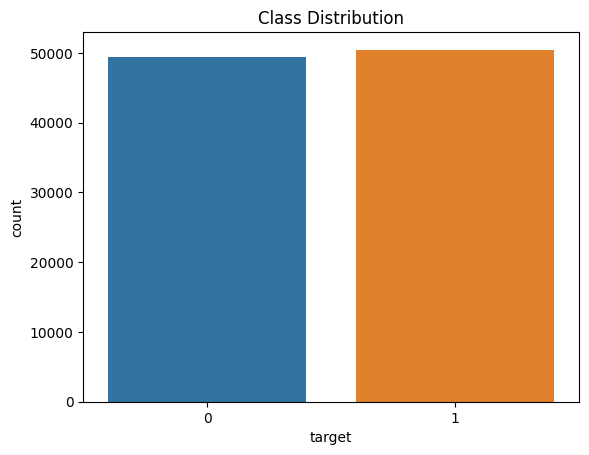

In [27]:
# Check if the target variable is balanced or not
import seaborn as sns
from matplotlib import pyplot as plt

sns.countplot(x='target', data=train_data)
plt.title('Class Distribution')
plt.show()

Target variable isn't imbalanced

In [28]:
# Cross verify if target variable is balanced or not
train_data['target'].value_counts(normalize=True)*100

target
1    50.526369
0    49.473631
Name: proportion, dtype: float64

### Performing EDA

#### Stats

`Performing chi2 stats on categorical features to show association between categorical variables`

In [29]:
# Chi2 stats and p_values
from itertools import combinations
from scipy.stats.contingency import chi2_contingency
import pandas as pd

chi2_results = []  # List to store chi-square stats and p-values

# Generate unique pairs of categorical columns
for cat_var1, cat_var2 in combinations(cat_cols, 2):  
    con_table = pd.crosstab(X[cat_var1], X[cat_var2])
    chi2_stat, p_value, dof, exp_freq = chi2_contingency(con_table)

    # Record the result
    chi2_results.append({
        'col1': cat_var1,
        'col2': cat_var2,
        'chi2_stat': chi2_stat,
        'p_value': p_value
    })

# Sort results based on chi-square value
chi2_results_sorted = sorted(chi2_results, key=lambda x: x['chi2_stat'], reverse=True)   

In [30]:
# Print the top 25 chi-square values and corresponding p-values
count = 1
for result in chi2_results_sorted:
    print(f"{count}) Chi-square and p_value between {result['col1']} and {result['col2']} are {result['chi2_stat']} and {result['p_value']} respectively")
    count += 1 
    if count==26:
        break

1) Chi-square and p_value between MachineID and SignatureVersion are 272948889.9999983 and 0.4534125607642536 respectively
2) Chi-square and p_value between MachineID and DateAS are 268955490.0000003 and 0.4537529083485509 respectively
3) Chi-square and p_value between SignatureVersion and DateAS are 268955490.0000002 and 0.0 respectively
4) Chi-square and p_value between MachineID and OSBuildLab are 27953799.999999996 and 0.4850285374592662 respectively
5) Chi-square and p_value between MachineID and NumericOSVersion are 21963700.000000007 and 0.48671995493384423 respectively
6) Chi-square and p_value between MachineID and DateOS are 11079021.0 and 0.49053701988708565 respectively
7) Chi-square and p_value between NumericOSVersion and DateOS are 11079021.0 and 0.0 respectively
8) Chi-square and p_value between OSBuildLab and NumericOSVersion are 9658750.838386051 and 0.0 respectively
9) Chi-square and p_value between MachineID and AppVersion are 6788779.999999997 and 0.492566030656027

In [31]:
# Checking how many p-values are less than 0.03 i.e. 97% confidence level
count = 0
chi2_value = 0 # store the last p_value chi2 score
for result in chi2_results_sorted:
    if (result['p_value'] <= 0.03) and (result['chi2_stat'] >= 1000) :
        count += 1
        chi2_value = result['chi2_stat']
print(count)
print(chi2_value)

267
1009.2805366161208


In [32]:
# Total no of p_values
len(chi2_results_sorted)

378

Probably there are many dependent categorical features in the dataset.

`Outlier Detection for numerical variables`

In [33]:
from scipy.stats import zscore

# Dictionary to store the number of outliers
outliers_count = {}

for col in num_cols:
    # Drop NaN and inf values
    clean_data = X[col].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Ensure the data is numeric
    if pd.api.types.is_numeric_dtype(clean_data):
        zscores = zscore(clean_data)  # Calculate z-scores
        outliers = (abs(zscores) > 3).sum()  # Count the number of outliers
        outliers_count[col] = outliers

for col in outliers_count.keys():
    if outliers_count[col] > 0:
        print(f"No of outliers in {col} is {outliers_count[col]}")

No of outliers in RealTimeProtectionState is 2141
No of outliers in IsPassiveModeEnabled is 1761
No of outliers in AntivirusConfigID is 1206
No of outliers in NumAntivirusProductsInstalled is 2347
No of outliers in NumAntivirusProductsEnabled is 2253
No of outliers in HasTpm is 322
No of outliers in OSBuildNumber is 1623
No of outliers in IsSystemProtected is 4455
No of outliers in SMode is 50
No of outliers in IEVersionID is 1617
No of outliers in FirewallEnabled is 1987
No of outliers in EnableLUA is 484
No of outliers in OEMModelID is 882
No of outliers in ProcessorCoreCount is 1314
No of outliers in ProcessorManufacturerID is 5
No of outliers in PrimaryDiskCapacityMB is 1216
No of outliers in SystemVolumeCapacityMB is 816
No of outliers in HasOpticalDiskDrive is 8125
No of outliers in TotalPhysicalRAMMB is 837
No of outliers in PrimaryDisplayDiagonalInches is 1285
No of outliers in PrimaryDisplayResolutionHorizontal is 1713
No of outliers in PrimaryDisplayResolutionVertical is 1898

In [34]:
# Features with at least 2% of outliers
count = 1
for col in (outliers_count.keys()):
    out_perc = (outliers_count[col]/X.shape[0])*100
    if out_perc >= 2:
        print(f"{count}) {round(out_perc,2)}% of data points in {col} are outliers. ")
        count += 1

1) 2.14% of data points in RealTimeProtectionState are outliers. 
2) 2.35% of data points in NumAntivirusProductsInstalled are outliers. 
3) 2.26% of data points in NumAntivirusProductsEnabled are outliers. 
4) 4.46% of data points in IsSystemProtected are outliers. 
5) 8.14% of data points in HasOpticalDiskDrive are outliers. 
6) 3.12% of data points in OSBuildNumberOnly are outliers. 
7) 3.12% of data points in OSBuildRevisionOnly are outliers. 
8) 4.06% of data points in IsPenCapable are outliers. 
9) 5.84% of data points in IsAlwaysOnAlwaysConnectedCapable are outliers. 


`Association between numerical features`

In [35]:
# Compute correlation matrix
corr_matrix = X[num_cols].corr()

# Filter for high correlations (>= 0.8)
high_corr = corr_matrix.abs()
high_corr = high_corr[high_corr >= 0.8]
high_corr = high_corr[high_corr < 1]

# Get highly correlated columns
high_corr_cols = high_corr.columns[high_corr.any()].tolist()

print(f"Highly correlated numerical columns are ")
np.array(high_corr_cols)

Highly correlated numerical columns are 


array(['RealTimeProtectionState', 'IsPassiveModeEnabled', 'OSBuildNumber',
       'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'OSBuildNumberOnly',
       'OSInstallLanguageID', 'OSUILocaleID'], dtype='<U34')

#### Visualization

`Correlation heatmap for highly correlated numerical features`

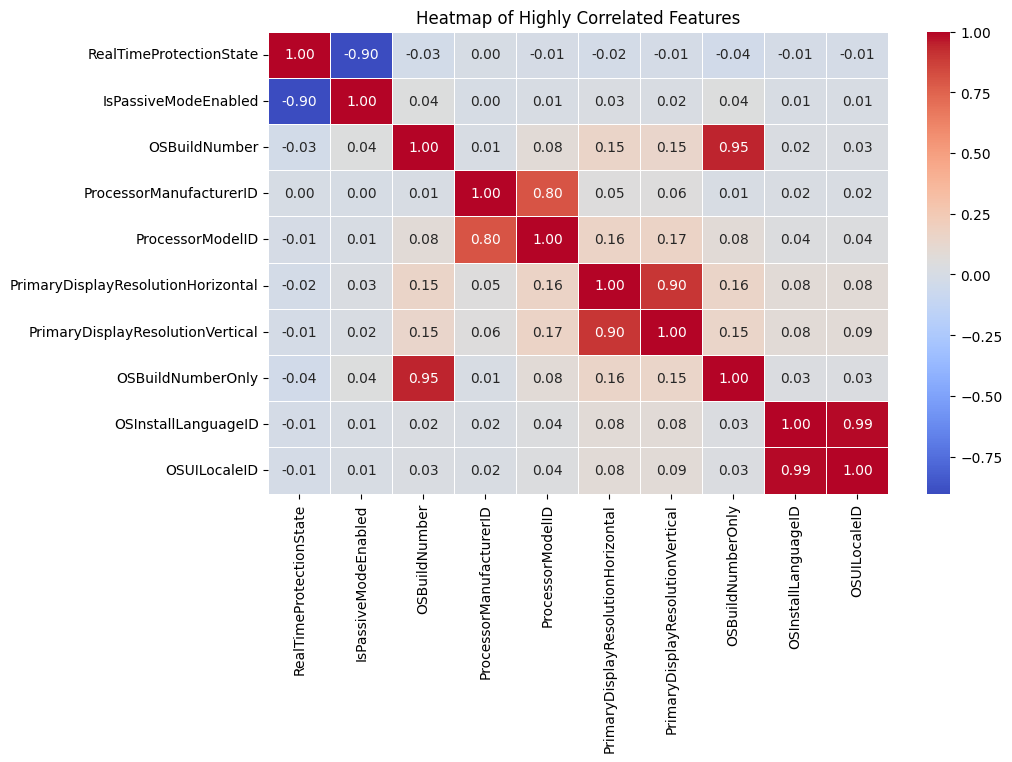

In [36]:
# Plot heatmap for highly correlated features
plt.figure(figsize=(10, 6))
sns.heatmap(X[high_corr_cols].corr(), cmap="coolwarm", annot=True, linewidths=0.5, fmt=".2f")
plt.title("Heatmap of Highly Correlated Features")
plt.show()

`Distribution of numerical features`

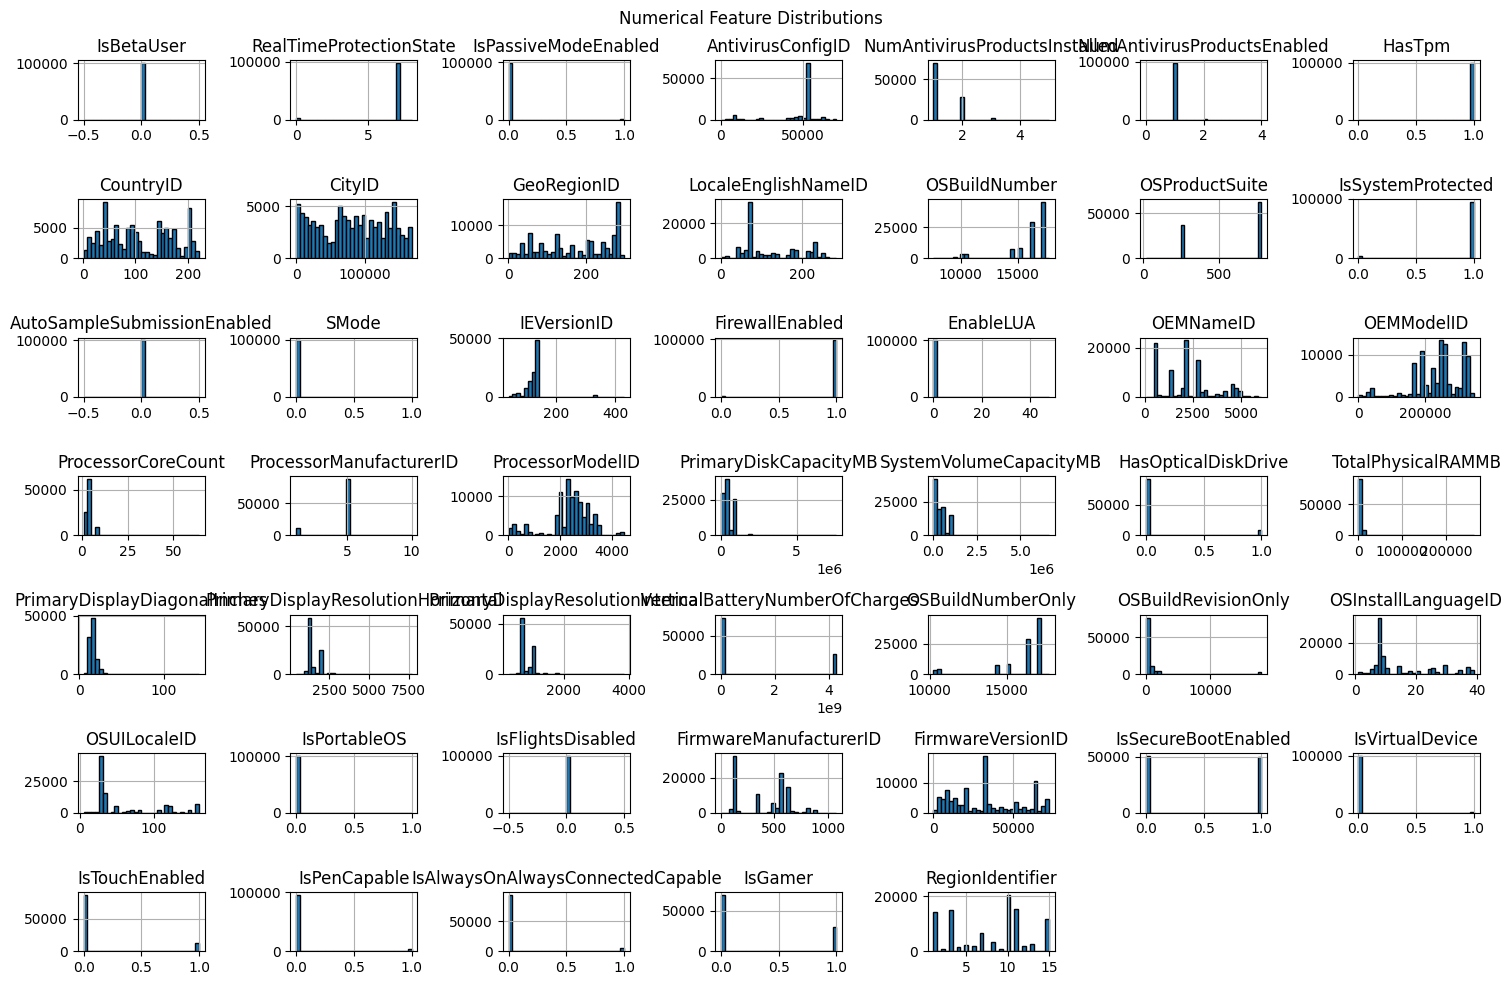

In [37]:
# Plot histogram for numerical features
X[num_cols].hist(figsize=(15, 10), bins=30, edgecolor="black")
plt.suptitle("Numerical Feature Distributions")
plt.tight_layout()
plt.show()


`Distrubution of categorical features`

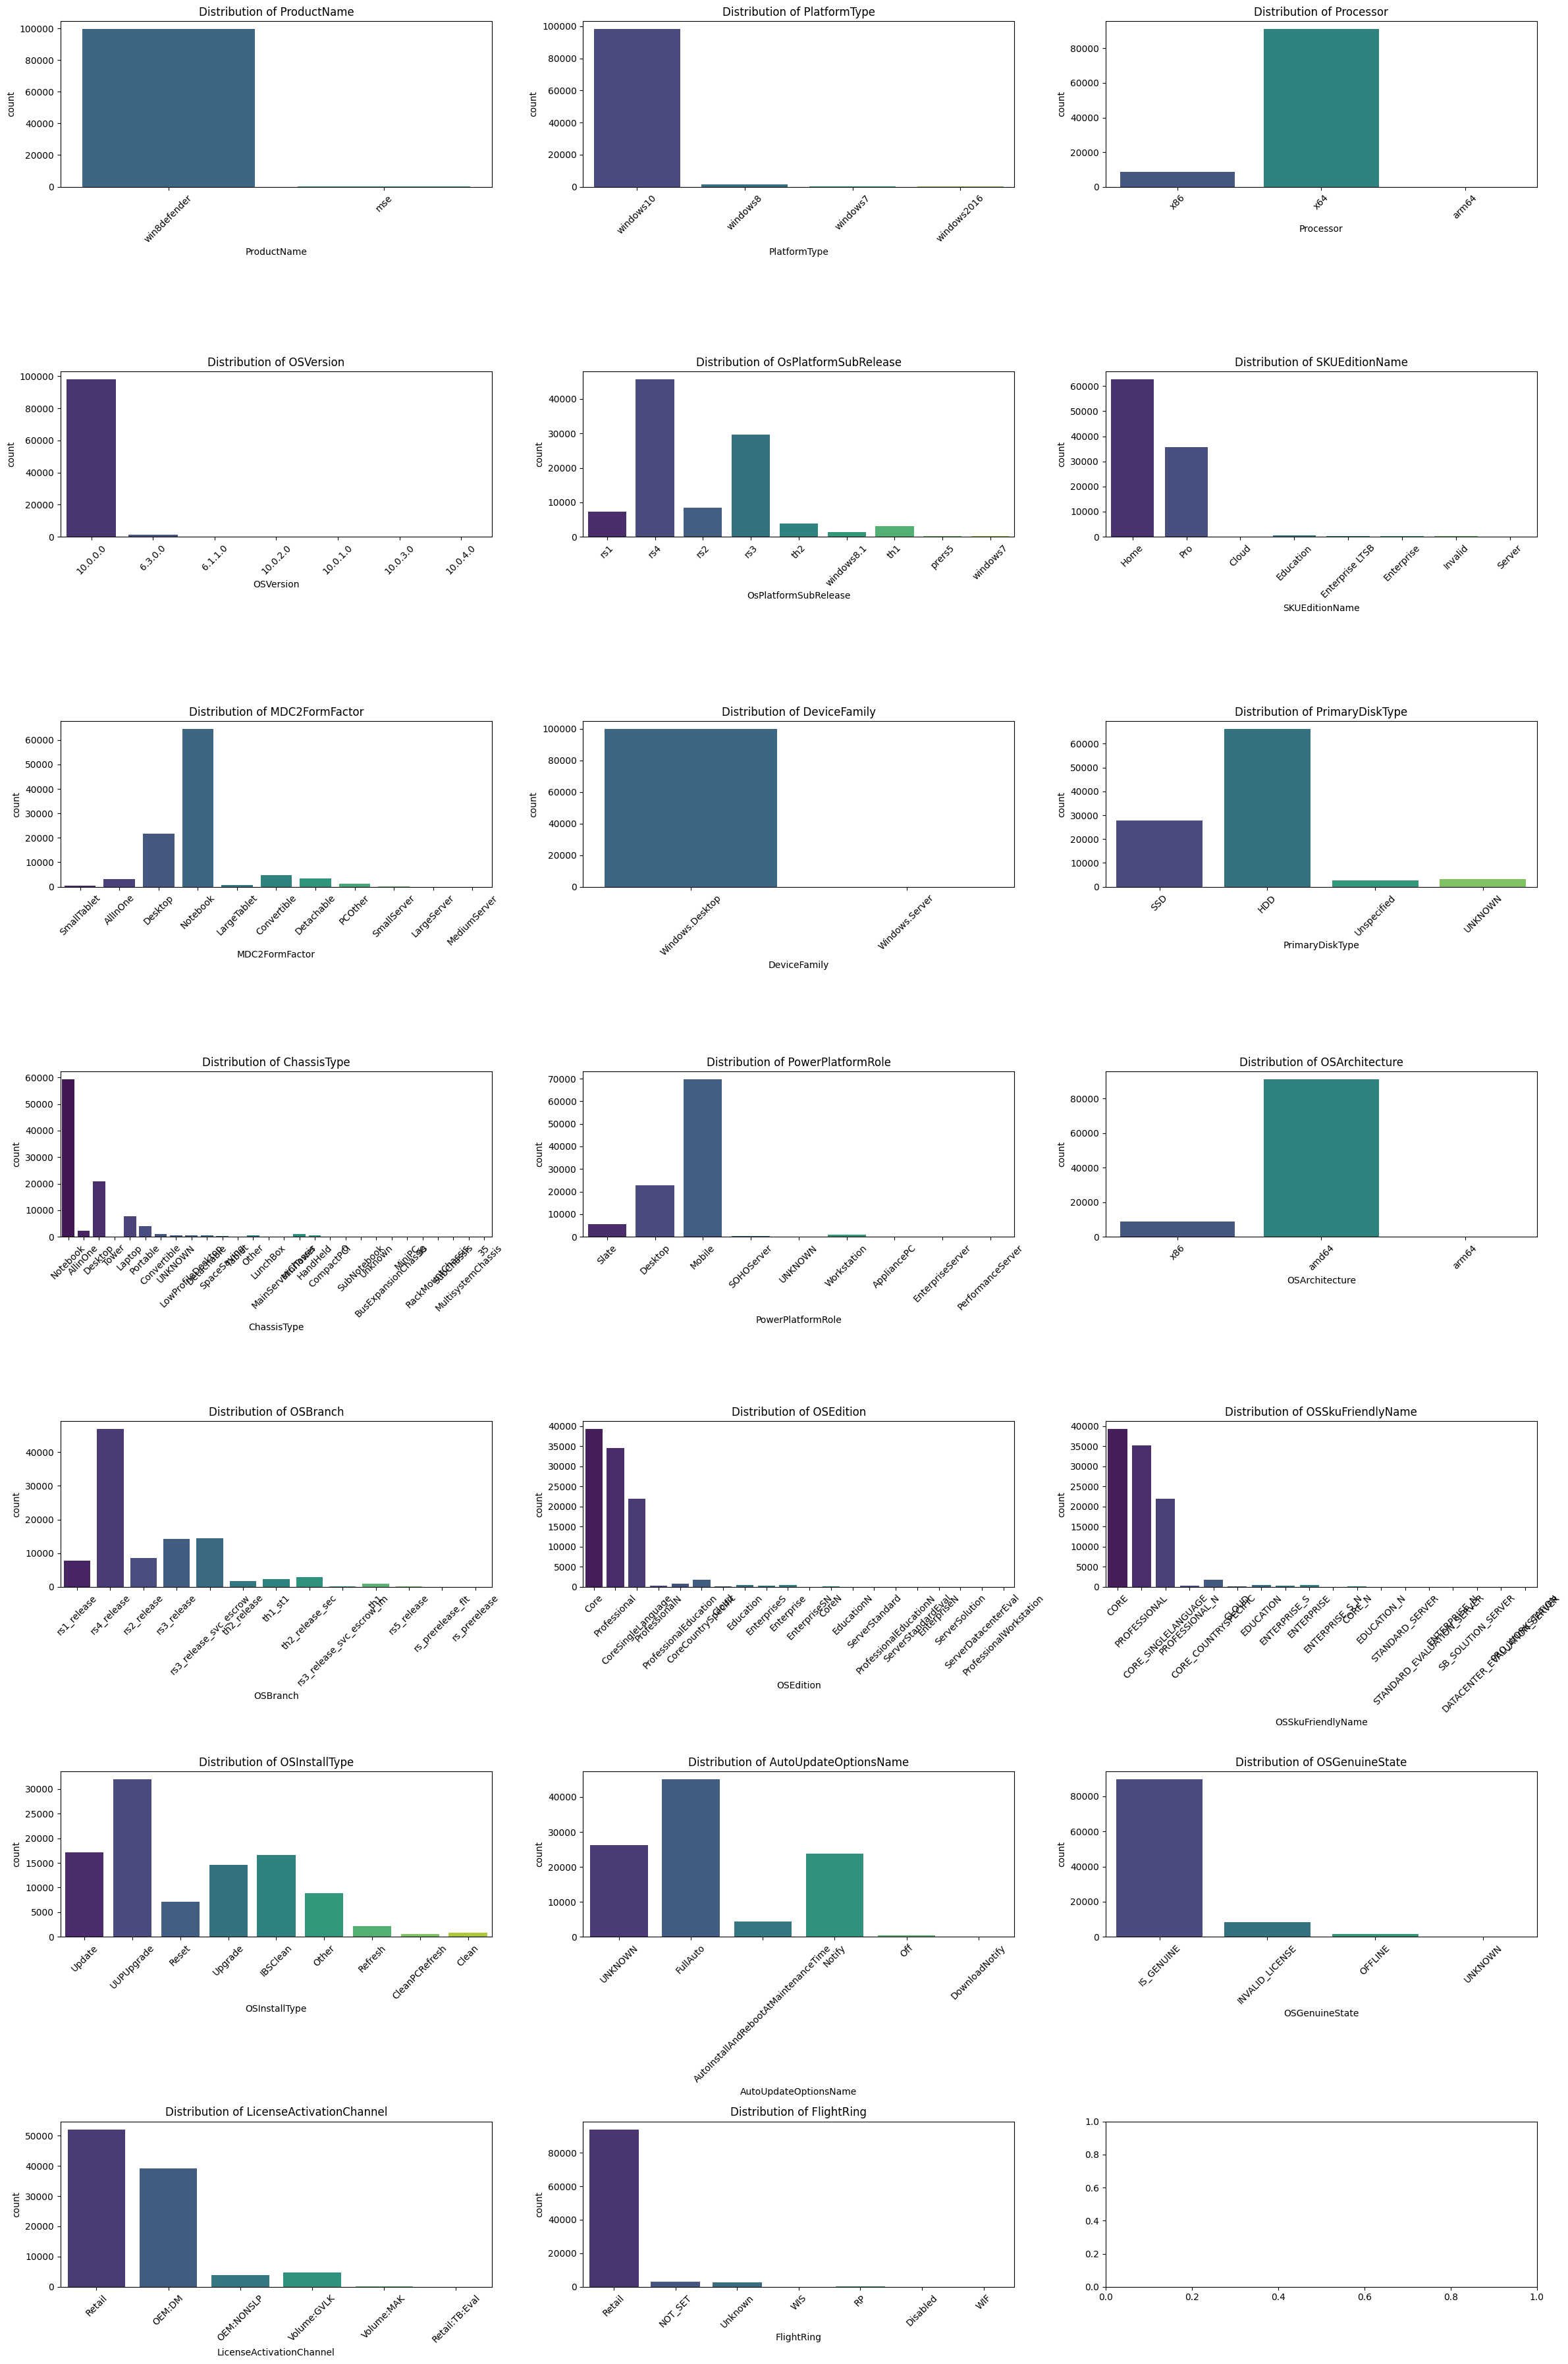

In [38]:
# Select categorical columns with fewer unique values for visualization
cat_sample_cols = [col for col in cat_cols if X[col].nunique() < 30]

# Plot bar plots for selected categorical columns
fig, axes = plt.subplots(len(cat_sample_cols)//3 + 1, 3, figsize=(24, 36))
axes = axes.flatten()

for i, col in enumerate(cat_sample_cols):
    sns.countplot(x=X[col], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### Handling Categoircal Features

In [39]:
# Unique ID for each machine => MachineID
(X['MachineID'].unique()).shape[0] 

99835

About all the samples have unique **MachineID**.
- **MachineID doesn't play any role in prediction**. So we can drop the feature.

In [40]:
X.drop(columns='MachineID',inplace=True)
X_test.drop(columns='MachineID',inplace=True) # preparing test set for prediction

In [41]:
# Name of the antivirus installed in a particular machine => ProductName
product_names = X['ProductName'].unique()
print(product_names)

['win8defender' 'mse']


In [42]:
# Storing nominal variables to a list  for convenience
nominal_vars = list()
nominal_vars.append('ProductName')

The order of values in ProductName may not be significant. 
The OneHotEncoder wil be used for encoding.

In [43]:
# Unique values of the feature 'EngineVersion'
engine_versions = np.sort(X['EngineVersion'].unique())
engine_versions[:5]

array(['1.1.12805.0', '1.1.12902.0', '1.1.13000.0', '1.1.13103.0',
       '1.1.13202.0'], dtype=object)

In [44]:
# No of unique values in the column EngineVersion
len(engine_versions)

37

In [45]:
# EngineVersion consolidation strategy
def version_consolidate(version):
    version = version[:7]
    return version

In [46]:
# Applying version consolidation strategy for efficient encoding
X['EngineVersion'] = X['EngineVersion'].apply(version_consolidate)
X_test['EngineVersion'] = X_test['EngineVersion'].apply(version_consolidate)

In [47]:
# Unique values after consolidation
engine_versions = np.sort(X['EngineVersion'].unique()) # sorting to preserve order
print(engine_versions)
len(engine_versions)

['1.1.128' '1.1.129' '1.1.130' '1.1.131' '1.1.132' '1.1.133' '1.1.134'
 '1.1.135' '1.1.136' '1.1.137' '1.1.138' '1.1.139' '1.1.140' '1.1.141'
 '1.1.142' '1.1.143' '1.1.144' '1.1.145' '1.1.146' '1.1.147' '1.1.148'
 '1.1.149' '1.1.150' '1.1.151' '1.1.152' '1.1.153']


26

In [48]:
# Dictionary to store unique classes of ordinal variable
OrdinalVars = {}
# Storing for easy ordinal encoding
OrdinalVars['EngineVersion'] = list(engine_versions)

The order of values in EngineVersion is significant, as later versions typically include advanced features not present in earlier versions. The OrdinalEncoder will be used to encode.

In [49]:
# AppVersion => Version of the Antivirus Application
app_versions = np.sort(X['AppVersion'].unique())
print(app_versions[:5])

['4.10.14393.0' '4.10.14393.1066' '4.10.14393.1198' '4.10.14393.1593'
 '4.10.14393.1613']


In [50]:
# No of unique values in the column AppVersion
len(app_versions)

69

In [51]:
# AppVersion consolidation strategy
def version_consolidate2(version):
    arr = version.split('.')
    if len(arr[1])==2:
        version = version[:8]
        return version
    version = version[:7]
    return version

In [52]:
# Applying version consolidation strategy for efficient encoding
X['AppVersion'] = X['AppVersion'].apply(version_consolidate2)
X_test['AppVersion'] = X_test['AppVersion'].apply(version_consolidate2)

In [53]:
# Sorting to help encoder for correct encoding
app_versions = sorted(X['AppVersion'].unique(), key=lambda v: [int(x) for x in v.split('.')])
print(app_versions)
len(app_versions)

['4.4.304', '4.5.216', '4.5.218', '4.6.305', '4.7.205', '4.8.102', '4.8.204', '4.8.207', '4.9.105', '4.9.218', '4.10.143', '4.10.205', '4.10.209', '4.11.150', '4.12.162', '4.12.170', '4.13.171', '4.14.176', '4.16.176', '4.17.176', '4.18.180']


21

In [54]:
OrdinalVars['AppVersion'] = list(app_versions)

The order of values in AppVersion is significant, as later versions typically include advanced features not present in earlier versions. The OrdinalEncoder will be used to encode.

In [55]:
# 'SignatureVersion': Version of the Antivirus Signatures
sign_versions = np.sort(X['SignatureVersion'].unique())
print(sign_versions[-30:])
len(sign_versions)

['1.275.974.0' '1.275.975.0' '1.275.977.0' '1.275.98.0' '1.275.981.0'
 '1.275.985.0' '1.275.988.0' '1.275.992.0' '1.275.993.0' '1.275.995.0'
 '1.275.997.0' '1.275.998.0' '1.277.13.0' '1.277.15.0' '1.277.18.0'
 '1.277.2.0' '1.277.20.0' '1.277.23.0' '1.277.25.0' '1.277.4.0'
 '1.277.41.0' '1.277.43.0' '1.277.46.0' '1.277.48.0' '1.277.49.0'
 '1.277.51.0' '1.277.58.0' '1.277.62.0' '1.277.64.0' '1.277.67.0']


2735

In [56]:
# SignatureVersion consolidation strategy 
def version_consolidate3(version):
    version = version[:5]
    return version

In [57]:
# applying version consolidation strategy for efficient encoding
X['SignatureVersion'] = X['SignatureVersion'].apply(version_consolidate3)
X_test['SignatureVersion'] = X_test['SignatureVersion'].apply(version_consolidate3)

In [58]:
sign_versions = np.sort(X['SignatureVersion'].unique()) # preserving orders
print(sign_versions)
len(sign_versions)

['1.223' '1.225' '1.227' '1.229' '1.231' '1.233' '1.235' '1.237' '1.239'
 '1.241' '1.243' '1.245' '1.247' '1.249' '1.251' '1.253' '1.255' '1.257'
 '1.259' '1.261' '1.263' '1.265' '1.267' '1.269' '1.271' '1.273' '1.275'
 '1.277']


28

In [59]:
OrdinalVars['SignatureVersion'] = list(sign_versions)

The order of values in SignatureVersion is significant, as later versions typically include advanced features not present in earlier versions. The OrdinalEncoder will be used to encode.

In [60]:
# 'PlatformType' : Platform Type Derived from OS and Processor Information
platform_types = np.sort(X['PlatformType'].unique())
print(platform_types)

['windows10' 'windows2016' 'windows7' 'windows8']


In [61]:
# Sorting to preserve orders for efficient encoding
import re

# Sort the array based on the numerical part extracted from each string
platform_types = sorted(platform_types, key=lambda v: int(re.search(r'\d+', v).group()))
print(platform_types)

['windows7', 'windows8', 'windows10', 'windows2016']


In [62]:
OrdinalVars['PlatformType'] = list(platform_types)

The order of values in PlatformType  is significant, as later versions are usually safer than earlier versions. The OrdinalEncoder will be used to encode.

In [63]:
# 'Processor' : Processor Architecture of the Installed OS
processors = (X['Processor'].unique())
print(processors)

['x86' 'x64' 'arm64']


The order of values in Processor may not be significant. 
The OneHotEncoder will be used for encoding.

In [64]:
nominal_vars.append('Processor') 

In [65]:
# 'OSVersion' : Operating System Version
os_versions = X['OSVersion'].unique()
print(os_versions[:5])
print(len(os_versions))

['10.0.0.0' '6.3.0.0' '6.1.1.0' '10.0.2.0' '10.0.1.0']
7


In [66]:
import re

# Sort the array based on the numerical part extracted from each string
os_versions = sorted(os_versions, key=lambda v: [int(x) for x in v.split('.')])
print(os_versions)

['6.1.1.0', '6.3.0.0', '10.0.0.0', '10.0.1.0', '10.0.2.0', '10.0.3.0', '10.0.4.0']


In [67]:
OrdinalVars['OSVersion'] = list(os_versions)

The order of values in OsVersion is significant, as later versions are usually safer than earlier versions. The OrdinalEncoder will be used to encode.

In [68]:
# 'OsPlatformSubRelease' : Sub-release of the Operating System
os_platform_sub_release = X['OsPlatformSubRelease'].unique()
print(os_platform_sub_release)

['rs1' 'rs4' 'rs2' 'rs3' 'th2' 'windows8.1' 'th1' 'prers5' 'windows7']


The order of values in OsPlatformSubRelease may be significant.

In [69]:
os_mapping = {
    'windows7': 1,'windows8.1': 2, 'th1': 3,'th2': 4,
    'rs1': 5,'rs2': 6,'rs3': 7,'rs4': 8,'prers5': 9
}
X["OsPlatformSubRelease"] = X["OsPlatformSubRelease"].map(os_mapping)
X_test["OsPlatformSubRelease"] = X_test["OsPlatformSubRelease"].map(os_mapping)

In [70]:
# 'OSBuildLab' : Detailed OS Build Information
os_build_lab = X['OSBuildLab'].unique()
print(len(os_build_lab))

281


In [71]:
os_build_lab[:5]

array(['14393.2214.x86fre.rs1_release_1.180402-1758',
       '17134.1.amd64fre.rs4_release.180410-1804',
       '15063.0.amd64fre.rs2_release.170317-1834',
       '17134.1.x86fre.rs4_release.180410-1804',
       '15063.0.x86fre.rs2_release.170317-1834'], dtype=object)

OsBuildLab has so many unique values so Frequency Encoding would more suitable.

In [72]:
#'SKUEditionName': SKU Edition of the Operating System
sku_edition_names = X['SKUEditionName'].unique()
print(sku_edition_names[:5])

['Home' 'Pro' 'Cloud' 'Education' 'Enterprise LTSB']


In [73]:
# No of unique values in SKUEditionName
len(sku_edition_names)

8

In [74]:
nominal_vars.append('SKUEditionName')

The order of values in SKUEditionName may not be significant. OneHotEncoder will be used for encoding.

In [75]:
mdc2_form_factors = X['MDC2FormFactor'].unique()
print(mdc2_form_factors[:5])
len(mdc2_form_factors)

['SmallTablet' 'AllInOne' 'Desktop' 'Notebook' 'LargeTablet']


11

In [76]:
nominal_vars.append('MDC2FormFactor')

The order of values in MDC2FormFactor may not be significant. OneHotEncoder will be used for encoding.

In [77]:
device_families = X['DeviceFamily'].unique()
print(device_families)

['Windows.Desktop' 'Windows.Server']


In [78]:
nominal_vars.append('DeviceFamily')

The order of values in DeviceFamily may not be significant. 
The OneHotEncoder will be used for encoding.

In [79]:
primary_disk_type = X['PrimaryDiskType'].unique()
print(primary_disk_type)

['SSD' 'HDD' 'Unspecified' 'UNKNOWN' nan]


In [80]:
# Grouping unusual values as 'Unknown'
X['PrimaryDiskType'] = X['PrimaryDiskType'].replace({'Unspecified': 'Unknown',
                                                     'UNKNOWN' : 'Unknown'})
X_test['PrimaryDiskType'] = X_test['PrimaryDiskType'].replace({'Unspecified': 'Unknown',
                                                     'UNKNOWN' : 'Unknown'})

In [81]:
primary_disk_type = X['PrimaryDiskType'].unique()
print(primary_disk_type)

['SSD' 'HDD' 'Unknown' nan]


In [82]:
nominal_vars.append('PrimaryDiskType')

The order of values in PrimaryDiskType may not be significant. 
The OneHotEncoder will be used for encoding.

In [83]:
chassis_types = X['ChassisType'].unique()
print(chassis_types[:5])

['Notebook' 'AllinOne' 'Desktop' 'Tower' 'Laptop']


In [84]:
# No of unique values in ChassisType feature
len(chassis_types)

29

In [85]:
# Grouping unusual values as 'Unknown'
X['ChassisType'] = X['ChassisType'].replace({'0': 'Unknown','30' : 'Unknown',
                                                     '35' : 'Unknown','UNKNOWN' : 'Unknown'})
X_test['ChassisType'] = X_test['ChassisType'].replace({'0': 'Unknown','30' : 'Unknown',
                                                     '35' : 'Unknown','UNKNOWN' : 'Unknown'})

In [86]:
# Unique values after grouping
chassis_types = X['ChassisType'].unique()
print(chassis_types)
len(chassis_types)

['Notebook' 'AllinOne' 'Desktop' 'Tower' 'Laptop' 'Portable' 'Convertible'
 'Unknown' 'LowProfileDesktop' 'Detachable' 'SpaceSaving' 'Tablet' 'Other'
 'LunchBox' 'MainServerChassis' 'MiniTower' 'HandHeld' 'CompactPCI' nan
 'SubNotebook' 'BusExpansionChassis' 'MiniPC' 'RackMountChassis'
 'SubChassis' 'MultisystemChassis']


25

The order of values in ChassisType may not be significant and many unique values
Frequency encoding will be more suitable.

In [87]:
# Unique values in PowerPlatformRole
power_platform_role = X['PowerPlatformRole'].unique()
print(power_platform_role)
len(power_platform_role)

['Slate' 'Desktop' 'Mobile' 'SOHOServer' 'UNKNOWN' 'Workstation'
 'AppliancePC' 'EnterpriseServer' 'PerformanceServer']


9

In [88]:
nominal_vars.append('PowerPlatformRole')

The order of values in PowerPlatformRole may not be significant. 
The OneHotEncoder will be used for encoding.

In [89]:
# Unique values in NumericOSVersion
numeric_os_versions = X['NumericOSVersion'].unique()
print(len(numeric_os_versions))
print(numeric_os_versions[-10:])
numeric_os_versions[:10]

221
['10.0.10240.16771' '10.0.17672.1000' '10.0.10586.338' '10.0.15060.0'
 '10.0.10240.16854' '10.0.10240.17024' '10.0.14393.1532' '10.0.17133.1'
 '10.0.14393.2273' '10.0.17686.1003']


array(['10.0.14393.2214', '10.0.17134.228', '10.0.17134.285',
       '10.0.15063.850', '10.0.17134.167', '10.0.17134.165',
       '10.0.15063.1209', '10.0.15063.1266', '10.0.16299.371',
       '10.0.16299.431'], dtype=object)

In [90]:
# NumericOsVersion consolidation strategy 
def numeric_os_version_consolidate(version):
    version = version[:10]
    return version
# Applying consolidation strategy for efficient encoding
X['NumericOSVersion'] = X['NumericOSVersion'].apply(numeric_os_version_consolidate)
X_test['NumericOSVersion'] = X_test['NumericOSVersion'].apply(numeric_os_version_consolidate)
len(X['NumericOSVersion'].unique())

23

In [91]:
numeric_os_versions = X['NumericOSVersion'].unique()

In [92]:
# Sorting for better ordinal encoding
numeric_os_versions = sorted(numeric_os_versions, key=lambda x: tuple(map(int, x.split('.'))))
print(numeric_os_versions)

['10.0.10240', '10.0.10586', '10.0.14393', '10.0.15060', '10.0.15063', '10.0.16299', '10.0.17133', '10.0.17134', '10.0.17672', '10.0.17686', '10.0.17692', '10.0.17723', '10.0.17735', '10.0.17738', '10.0.17741', '10.0.17744', '10.0.17746', '10.0.17751', '10.0.17754', '10.0.17755', '10.0.17758', '10.0.17760', '10.0.17763']


In [93]:
OrdinalVars['NumericOSVersion'] = list(numeric_os_versions)

The order of values in NumericOSVersion is significant, as later versions are usually safer than earlier versions. The OrdinalEncoder will be used to encode.

In [94]:
# Unique values in OSArchitecture
os_architecture = X['OSArchitecture'].unique()
print(os_architecture)

['x86' 'amd64' 'arm64']


In [95]:
nominal_vars.append('OSArchitecture')

The order of values in OSArchitecture may not be significant. 
The OneHotEncoder will be used for encoding.

In [96]:
#Unique values in OSBranch
os_branches = X['OSBranch'].unique()
print(os_branches)

['rs1_release' 'rs4_release' 'rs2_release' 'rs3_release'
 'rs3_release_svc_escrow' 'th2_release' 'th1_st1' 'th2_release_sec'
 'rs3_release_svc_escrow_im' 'th1' 'rs5_release' 'rs_prerelease_flt'
 'rs_prerelease']


In [97]:
# Mapping to numeric values to preserve order
os_branch_mapping = {
    'th1': 1,'th1_st1': 2,'th2_release': 3,'th2_release_sec': 4,
    'rs1_release': 5,'rs2_release': 6,'rs3_release': 7,
    'rs3_release_svc_escrow': 8,'rs3_release_svc_escrow_im': 9,
    'rs4_release': 10,'rs5_release': 11,
    'rs_prerelease': 12,'rs_prerelease_flt': 13
}

X["OSBranch"] = X["OSBranch"].map(os_branch_mapping)
X_test["OSBranch"] = X_test["OSBranch"].map(os_branch_mapping)

The order of unique values in OSBranch may be significant 

In [98]:
# Unique values in OSEdition
os_editions = X['OSEdition'].unique()
print(os_editions)

['Core' 'Professional' 'CoreSingleLanguage' 'ProfessionalN'
 'ProfessionalEducation' 'CoreCountrySpecific' 'Cloud' 'Education'
 'EnterpriseS' 'Enterprise' 'EnterpriseSN' 'CoreN' 'EducationN'
 'ServerStandard' 'ProfessionalEducationN' 'ServerStandardEval'
 'EnterpriseN' 'ServerSolution' 'ServerDatacenterEval'
 'ProfessionalWorkstation']


In [99]:
# No of unique values in OSEdition
len(os_editions)

20

In [100]:
nominal_vars.append('OSEdition')

The order of values in OSEdition may not be significant. OneHotEncoder will be used to encode.

In [101]:
# Unique values in OSSkuFriendlyName
os_sku_friendly_names = X['OSSkuFriendlyName'].unique()
os_sku_friendly_names[:5]

array(['CORE', 'PROFESSIONAL', 'CORE_SINGLELANGUAGE', 'PROFESSIONAL_N',
       'CORE_COUNTRYSPECIFIC'], dtype=object)

In [102]:
# No of unique values in OSSkuFriendlyName
len(os_sku_friendly_names)

18

In [103]:
nominal_vars.append('OSSkuFriendlyName')

OneHotEncoder will be used to encode.

In [104]:
# Unique values in OSInstallType
os_install_types = X['OSInstallType'].unique()
print(os_install_types)
len(os_install_types)

['Update' 'UUPUpgrade' 'Reset' 'Upgrade' 'IBSClean' 'Other' 'Refresh'
 'CleanPCRefresh' 'Clean']


9

In [105]:
nominal_vars.append('OSInstallType')

OneHotEncoder will be used to encode.

In [106]:
# Unique values in AutoUpdateOptionName
auto_update_options_names = X['AutoUpdateOptionsName'].unique() 
print(auto_update_options_names)

['UNKNOWN' 'FullAuto' 'AutoInstallAndRebootAtMaintenanceTime' 'Notify'
 'Off' 'DownloadNotify']


In [107]:
nominal_vars.append('AutoUpdateOptionsName')

The order of values in AutoUpdateOptionsName may not be significant. The OneHotEncoder will be used to encode.

In [108]:
# Unique values in OSGenuineState
os_genuine_states = X['OSGenuineState'].unique()
print(os_genuine_states)

['IS_GENUINE' 'INVALID_LICENSE' 'OFFLINE' 'UNKNOWN']


In [109]:
nominal_vars.append('OSGenuineState')

The order of values in OSGenuineState may not be significant. The OneHotEncoder will be used to encode.

In [110]:
# Unique values in LicenceActivationChannel
license_activation_channels = X['LicenseActivationChannel'].unique()
print(license_activation_channels)

['Retail' 'OEM:DM' 'OEM:NONSLP' 'Volume:GVLK' 'Volume:MAK'
 'Retail:TB:Eval']


In [111]:
nominal_vars.append('LicenseActivationChannel')

The order of values in OSGenuineState may not be significant. The OneHotEncoder will be used to encode.

In [112]:
# Unique values in FlightRing
flight_rings = X['FlightRing'].unique()
print(flight_rings[:5])
len(flight_rings)

['Retail' 'NOT_SET' 'Unknown' 'WIS' 'RP']


7

In [113]:
nominal_vars.append('FlightRing')

In [114]:
# Unique values in DateAS
date_as = X['DateAS'].unique()
len(date_as) # no of unique values

2695

In [115]:
# Unique values in DateOS
date_os = X['DateOS'].unique()
len(date_os) # no of unuque values

113

In [116]:
# converting  date columns to pandas datetime
X['DateAS'] = pd.to_datetime(X['DateAS'])
X['DateOS'] = pd.to_datetime(X['DateOS'])

X_test['DateAS'] = pd.to_datetime(X_test['DateAS'])
X_test['DateOS'] = pd.to_datetime(X_test['DateOS'])

In [117]:
# Extracting usefull features from datetime columns 
# and drop these columns; for simpler interpretation. 

# Antivirsu Scan since last os update
X["Age_Days"] = (X["DateAS"] - X["DateOS"]).dt.days

# Malware funtion could occur in weekends
X["DateAS_Weekday"] = X["DateAS"].dt.weekday  # 0 = Monday, 6 = Sunday
X["DateOS_Weekday"] = X["DateOS"].dt.weekday

# Seasonal trends if present
X['MonthAS'] = X['DateAS'].dt.month
X['MonthOS'] = X['DateOS'].dt.month

# Oudated OS and Antivirus indicator
X["OS_Install_Year"] = X["DateOS"].dt.year
X["AS_Install_Year"] = X["DateAS"].dt.year

X.drop(columns='DateAS',inplace=True)
X.drop(columns='DateOS',inplace=True)

In [118]:
# Same for test data
X_test["Age_Days"] = (X_test["DateAS"] - X_test["DateOS"]).dt.days

X_test["DateAS_Weekday"] = X_test["DateAS"].dt.weekday 
X_test["DateOS_Weekday"] = X_test["DateOS"].dt.weekday 

X_test['MonthAS'] = X_test['DateAS'].dt.month
X_test['MonthOS'] = X_test['DateOS'].dt.month

X_test["OS_Install_Year"] = X_test["DateOS"].dt.year
X_test["AS_Install_Year"] = X_test["DateAS"].dt.year

X_test.drop(columns='DateAS',inplace=True)
X_test.drop(columns='DateOS',inplace=True)

In [119]:
# Feautres which will be encoded using OrdinalEncoder
ordinal_vars = list(OrdinalVars.keys())

In [120]:
# Categorical Features after feature engineering and sample filtration on categorical variables
cat_vars = X.select_dtypes(include='object').columns.to_list()
len(cat_vars)

23

Intially we have 28 categorical features. Now we drop 3 feautres[ MachineID, DateAS, DateOS ] and map 2 features[ OsPlatformSubRelease, OSBranch ] into numeric value.

### Handling Numerical Features

In [121]:
# IsFlightsDisabled, AutoSampleSubmissionEnabled, IsBetaUser  
# 0 (zero) throughput features
zero_ = ['IsFlightsDisabled', 'AutoSampleSubmissionEnabled', 'IsBetaUser'] 

In [122]:
X[zero_].describe().T

,count,mean,std,min,25%,50%,75%,max
IsFlightsDisabled,99509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AutoSampleSubmissionEnabled,99835.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IsBetaUser,99835.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# Droping zero throughput numerical features
X.drop(columns=zero_, inplace=True)
X_test.drop(columns=zero_, inplace=True)

In [124]:
# Descriptive stats after some manupulation and feature engineering
X.describe().T

,count,mean,std,min,25%,50%,75%,max
RealTimeProtectionState,99769.0,6.848320e+00,1.015524e+00,0.0,7.0,7.0,7.000000e+00,8.000000e+00
IsPassiveModeEnabled,99835.0,1.763910e-02,1.316364e-01,0.0,0.0,0.0,0.000000e+00,1.000000e+00
AntivirusConfigID,99759.0,4.797648e+04,1.380242e+04,39.0,49480.0,53447.0,5.344700e+04,7.049000e+04
NumAntivirusProductsInstalled,99759.0,1.326457e+00,5.206234e-01,1.0,1.0,1.0,2.000000e+00,5.000000e+00
NumAntivirusProductsEnabled,99759.0,1.018224e+00,1.551352e-01,0.0,1.0,1.0,1.000000e+00,4.000000e+00
HasTpm,99835.0,9.967747e-01,5.670054e-02,0.0,1.0,1.0,1.000000e+00,1.000000e+00
CountryID,99835.0,1.080612e+02,6.306335e+01,1.0,51.0,97.0,1.620000e+02,2.220000e+02
CityID,99212.0,8.102525e+04,4.894299e+04,7.0,36679.5,82373.0,1.228010e+05,1.679570e+05
GeoRegionID,99835.0,1.697167e+02,8.919467e+01,1.0,89.0,181.0,2.670000e+02,2.960000e+02
LocaleEnglishNameID,99835.0,1.226824e+02,6.924175e+01,1.0,74.0,88.0,1.820000e+02,2.830000e+02


In [125]:
# Numerical variables after doing feature engineering and sample filtration
num_vars = X.select_dtypes(exclude='object').columns.to_list()
len(num_vars)

53

Initially we have 47 numerical features. Now we drop 3 features, map 2 features in numerical from categorical and extract 6 features from DateAS, DateOS.

In [126]:
# Shape of the dataset after feature engineering
X.shape

(99835, 76)

### Preprocessing

In [127]:
# Total no of null values in train dataset
X.isnull().sum().sum()

6279

In [128]:
# Total no of null values in test dataset
X_test.isnull().sum().sum()

607

In [129]:
# Imputing null values 
from sklearn.impute import SimpleImputer

cat_si = SimpleImputer(strategy='most_frequent')
num_si = SimpleImputer(strategy='mean')

X_impute = pd.DataFrame()
X_impute[cat_vars] = cat_si.fit_transform(X[cat_vars])
X_impute[num_vars] = num_si.fit_transform(X[num_vars])

In [130]:
print(X_impute.shape,"--- null values : ",X_impute.isnull().sum().sum())
X_impute.head()

(99835, 76) --- null values :  0


,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OSBuildLab,SKUEditionName,MDC2FormFactor,...,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,Age_Days,DateAS_Weekday,DateOS_Weekday,MonthAS,MonthOS,OS_Install_Year,AS_Install_Year
0,win8defender,1.1.152,4.18.180,1.275,windows10,x86,10.0.0.0,14393.2214.x86fre.rs1_release_1.180402-1758,Home,SmallTablet,...,1.0,0.0,6.0,146.0,0.0,1.0,9.0,4.0,2018.0,2018.0
1,win8defender,1.1.151,4.18.180,1.273,windows10,x64,10.0.0.0,17134.1.amd64fre.rs4_release.180410-1804,Pro,AllInOne,...,0.0,0.0,10.0,2.0,3.0,1.0,8.0,8.0,2018.0,2018.0
2,win8defender,1.1.152,4.18.180,1.275,windows10,x64,10.0.0.0,17134.1.amd64fre.rs4_release.180410-1804,Home,Desktop,...,0.0,1.0,6.0,9.0,3.0,1.0,9.0,9.0,2018.0,2018.0
3,win8defender,1.1.152,4.12.170,1.275,windows10,x64,10.0.0.0,15063.0.amd64fre.rs2_release.170317-1834,Home,Notebook,...,0.0,0.0,12.0,254.0,4.0,2.0,9.0,1.0,2018.0,2018.0
4,win8defender,1.1.152,4.13.171,1.275,windows10,x86,10.0.0.0,17134.1.x86fre.rs4_release.180410-1804,Pro,Desktop,...,0.0,1.0,7.0,4.0,5.0,1.0,9.0,9.0,2018.0,2018.0


In [131]:
# Imputing test dataset

X_test_impute = pd.DataFrame()
X_test_impute[cat_vars] = cat_si.transform(X_test[cat_vars])
X_test_impute[num_vars] = num_si.transform(X_test[num_vars])

In [132]:
print(X_test_impute.shape,"--- null values : ",X_test_impute.isnull().sum().sum())
X_test_impute.head()

(10000, 76) --- null values :  0


,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OSBuildLab,SKUEditionName,MDC2FormFactor,...,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,Age_Days,DateAS_Weekday,DateOS_Weekday,MonthAS,MonthOS,OS_Install_Year,AS_Install_Year
0,win8defender,1.1.151,4.18.180,1.273,windows10,x64,10.0.0.0,17134.1.amd64fre.rs4_release.180410-1804,Pro,Notebook,...,0.0,1.0,11.0,33.0,6.0,1.0,8.0,7.0,2018.0,2018.0
1,win8defender,1.1.151,4.10.209,1.273,windows8,x64,6.3.0.0,9600.19067.amd64fre.winblue_ltsb_escrow.180619...,Home,Notebook,...,0.0,0.0,12.0,653.0,3.0,1.0,7.0,10.0,2016.0,2018.0
2,win8defender,1.1.152,4.18.180,1.275,windows10,x64,10.0.0.0,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,Notebook,...,0.0,0.0,10.0,111.0,0.0,1.0,8.0,5.0,2018.0,2018.0
3,win8defender,1.1.153,4.18.180,1.277,windows10,x64,10.0.0.0,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,Notebook,...,0.0,0.0,10.0,140.0,1.0,1.0,9.0,5.0,2018.0,2018.0
4,win8defender,1.1.148,4.14.176,1.267,windows10,x64,10.0.0.0,17134.1.amd64fre.rs4_release.180410-1804,Pro,Notebook,...,0.0,0.0,7.0,-37.0,6.0,1.0,5.0,6.0,2018.0,2018.0


In [133]:
# Checking values of OSBuildLab and ChassisType before frequency encoding
print(X_impute['OSBuildLab'].unique()[:5])
print(X_impute['ChassisType'].unique()[:5])

['14393.2214.x86fre.rs1_release_1.180402-1758'
 '17134.1.amd64fre.rs4_release.180410-1804'
 '15063.0.amd64fre.rs2_release.170317-1834'
 '17134.1.x86fre.rs4_release.180410-1804'
 '15063.0.x86fre.rs2_release.170317-1834']
['Notebook' 'AllinOne' 'Desktop' 'Tower' 'Laptop']


In [134]:
print(X_test_impute['OSBuildLab'].unique()[:5])
print(X_test_impute['ChassisType'].unique()[:5])

['17134.1.amd64fre.rs4_release.180410-1804'
 '9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033'
 '16299.431.amd64fre.rs3_release_svc_escrow.180502-1908'
 '16299.15.amd64fre.rs3_release.170928-1534'
 '14393.576.x86fre.rs1_release_inmarket.161208-2252']
['Notebook' 'AllinOne' 'Desktop' 'Laptop' 'Portable']


In [135]:
# Frequency Encoding for OSBuildLab and ChassisType
freq_dist = X_impute['OSBuildLab'].value_counts(normalize=True)
X_impute['OSBuildLab'] = X_impute['OSBuildLab'].map(freq_dist)

freq_dist2 = X_impute['ChassisType'].value_counts(normalize=True)
X_impute['ChassisType'] = X_impute['ChassisType'].map(freq_dist2)

In [136]:
# Frequency encoding  the test dataset
X_test_impute['OSBuildLab'] = X_test_impute['OSBuildLab'].map(freq_dist)

X_test_impute['ChassisType'] = X_test_impute['ChassisType'].map(freq_dist2)

In [137]:
# Verifying encoded successfully or not
print(X_impute['OSBuildLab'].unique()[:5])
print(X_impute['ChassisType'].unique()[:5])

[0.0008514  0.42965894 0.07759804 0.02869735 0.00619021]
[0.59463114 0.02265738 0.20821355 0.00128212 0.07816898]


In [138]:
print(X_test_impute['OSBuildLab'].unique()[:5])
print(X_test_impute['ChassisType'].unique()[:5])

[4.29658937e-01 4.16687534e-03 1.51540041e-01 1.11073271e-01
 1.00165273e-04]
[0.59463114 0.02265738 0.20821355 0.07816898 0.04119798]


In [139]:
# shape after imputation and frequency encoding
X_impute.shape

(99835, 76)

In [140]:
# Splitting the dataset into train and validation set
from sklearn.model_selection import train_test_split

X_train,X_val, y_train,y_val = train_test_split(X_impute,y, test_size=0.2,random_state=21,stratify=y)
# shape of train and validation set
print(f"Shape of train data set {X_train.shape}")
print(f"Shape of validation data set {X_val.shape} ")
# shape of target variable in train and validation set
y_train.shape , y_val.shape

Shape of train data set (79868, 76)
Shape of validation data set (19967, 76) 


((79868,), (19967,))

In [141]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define transformers
one_hot_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

categories = [OrdinalVars[col] for col in ordinal_vars]  # Ensure predefined order
ordinal_enc = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)

# Column transformer to handle encoding
transformer = ColumnTransformer([
    ('passsthrough','passthrough',num_vars),
    ('ord_enc', ordinal_enc, ordinal_vars),
    ('onehot_enc', one_hot_enc, nominal_vars)
])

# Full pipeline: Encoding + Scaling
pipe = Pipeline([
    ('composer', transformer),
    ('scaler', RobustScaler())  # Apply RobustScaler after encoding
])

display(pipe)

Pipeline(steps=[('composer',
                 ColumnTransformer(transformers=[('passsthrough', 'passthrough',
                                                  ['RealTimeProtectionState',
                                                   'IsPassiveModeEnabled',
                                                   'AntivirusConfigID',
                                                   'NumAntivirusProductsInstalled',
                                                   'NumAntivirusProductsEnabled',
                                                   'HasTpm', 'CountryID',
                                                   'CityID', 'GeoRegionID',
                                                   'LocaleEnglishNameID',
                                                   'OSBuildNumber',
                                                   'OSProductSuite',
                                                   'OsPlatformSubRelease',
                                                   'IsSys...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['ProductName', 'Processor',
                                                   'SKUEditionName',
                                                   'MDC2FormFactor',
                                                   'DeviceFamily',
                                                   'PrimaryDiskType',
                                                   'PowerPlatformRole',
                                                   'OSArchitecture',
                                                   'OSEdition',
                                                   'OSSkuFriendlyName',
                                                   'OSInstallType',
                                                   'AutoUpdateOptionsName',
                                                   'OSGenuineState',
                                                   'LicenseActivationChannel',
                                                   'FlightRing'])])),
                ('scaler', RobustScaler())])

In [142]:
# Fit and transform data
X_train_trans = pipe.fit_transform(X_train)
X_val_trans = pipe.transform(X_val)
X_test_trans = pipe.transform(X_test_impute)

In [143]:
# shape of datasets after transformation
X_train_trans.shape, X_val_trans.shape, X_test_trans.shape

((79868, 170), (19967, 170), (10000, 170))

In [144]:
# Reducing dimensions using pca
from sklearn.decomposition import PCA

pca = PCA(n_components=0.97) # Retaining 97% variance
X_train_decom = pca.fit_transform(X_train_trans)
X_val_decom = pca.transform(X_val_trans)
X_train_decom.shape,X_val_decom.shape

((79868, 31), (19967, 31))

In [145]:
# Decomposing test dataset
X_test_decom = pca.transform(X_test_trans)
X_test_decom.shape

(10000, 31)

### Model Building

In [146]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

I got accuracy score of 0.578 in decomposed and 0.605 in  non-decomposed data using LogisticRegression

I got accuracy score of 0.593 in decomposed data and 0.609 in non-decomposed data using DecisionTreeClassifier

I got a score of 0.58 using LinearSVC

I got a score of 0.597 using SGDClassifier

I got a score of 0.613 using RandomForestClassifier and the top 20 important features are 'PrimaryDisplayDiagonalInches', 'SMode', 'OSProductSuite',
       'ProcessorModelID', 'OsPlatformSubRelease', 'RealTimeProtectionState',
       'OSBuildNumber', 'OSInstallType', 'AppVersion',
       'SystemVolumeCapacityMB', 'NumAntivirusProductsEnabled',
       'MDC2FormFactor', 'SKUEditionName', 'OSVersion', 'FlightRing',
       'AutoUpdateOptionsName', 'PrimaryDiskCapacityMB', 'IEVersionID',
       'IsPassiveModeEnabled', 'OSBuildLab'

In [147]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [148]:
hgboost = HistGradientBoostingClassifier(max_iter=200)
hgboost.fit(X_train_trans, y_train)
accuracy = hgboost.score(X_val_trans,y_val)
# accuracy score with decomposed data is 0.6107076676516252
print(f"{round(accuracy*100,2)} % of data points are correctly predicted by hgboost model")

62.92 % of data points are correctly predicted by hgboost model


In [149]:
# Classification report
y_pred_hgb = hgboost.predict(X_val_trans)
hgb_report = classification_report(y_val,y_pred_hgb)
print(hgb_report)

              precision    recall  f1-score   support

           0       0.64      0.59      0.61      9878
           1       0.62      0.67      0.65     10089

    accuracy                           0.63     19967
   macro avg       0.63      0.63      0.63     19967
weighted avg       0.63      0.63      0.63     19967



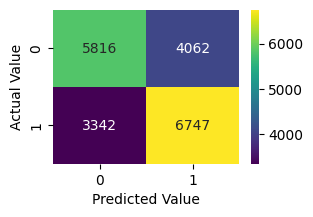

In [150]:
# Plotting confusion matrix
mat_hgb = confusion_matrix(y_val,y_pred_hgb)
plt.figure(figsize=(3,2))
sns.heatmap(mat_hgb, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Correctly predicted data points : **12,563** out of 19967

In [151]:
# Hyperparameter tunning for hgboost
param_dist = {
    "max_iter": [100, 200, 300],  
    "learning_rate": [0.01, 0.1, 1], 
    "min_samples_leaf": [15, 20, 25],  
    "l2_regularization": [0.0, 0.1, 1.0]  
}


# RandomizedSearchCV with 3-fold cross-validation
hgboost_tune = RandomizedSearchCV(hgboost, param_dist, cv=3, 
                                  scoring="accuracy", n_jobs=-1, 
                                  n_iter= 15, verbose=2)
hgboost_tune.fit(X_train_trans, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3, estimator=HistGradientBoostingClassifier(max_iter=200),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'l2_regularization': [0.0, 0.1, 1.0],
                                        'learning_rate': [0.01, 0.1, 1],
                                        'max_iter': [100, 200, 300],
                                        'min_samples_leaf': [15, 20, 25]},
                   scoring='accuracy', verbose=2)

In [152]:
# Best training accuracy score after tuning
hgboost_tune.best_score_

0.6231281596237985

In [153]:
accuracy = hgboost_tune.score(X_val_trans,y_val) # accuracy score on validation set
print(f"{round(accuracy*100,2)} % of data points are correctly predicted by hgboost model after hyperparameter tunning")

62.83 % of data points are correctly predicted by hgboost model after hyperparameter tunning


In [154]:
# Classification report
y_pred_hgbtune = hgboost_tune.predict(X_val_trans)
hgbtune_report = classification_report(y_val,y_pred_hgbtune)
print(hgbtune_report)

              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9878
           1       0.62      0.66      0.64     10089

    accuracy                           0.63     19967
   macro avg       0.63      0.63      0.63     19967
weighted avg       0.63      0.63      0.63     19967



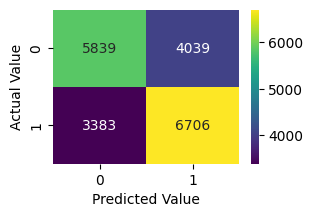

In [155]:
# plotting confusion matrix after hyperparameter tunning of the hgboost model
mat_hgbtune = confusion_matrix(y_val,y_pred_hgbtune)
plt.figure(figsize=(3,2))
sns.heatmap(mat_hgbtune, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Correctly predicted points : **12,545** out of 19967

In [156]:
import xgboost as xgb

# Define XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    learning_rate=0.16,
    n_estimators=100,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train XGBoost model
xgb_model.fit(X_train_trans, y_train, eval_set=[(X_val_trans, y_val)],verbose=False)

# Make predictions
y_pred_xgb = xgb_model.predict(X_val_trans)


In [157]:
#  accuracy on validation set
accuracy = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy*100:.2f} %")

XGBoost Accuracy: 63.01 %


In [158]:
# Classification Report
xgb_report = classification_report(y_val,y_pred_xgb)
print(f"Classification Report of XBoost")
print(xgb_report)

Classification Report of XBoost
              precision    recall  f1-score   support

           0       0.64      0.59      0.61      9878
           1       0.62      0.67      0.65     10089

    accuracy                           0.63     19967
   macro avg       0.63      0.63      0.63     19967
weighted avg       0.63      0.63      0.63     19967



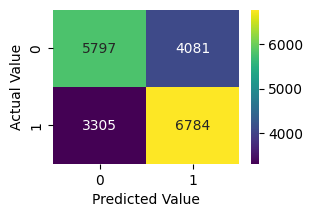

In [159]:
# Confusion Matrix
mat_xgb = confusion_matrix(y_val,y_pred_xgb)
plt.figure(figsize=(3,2))
sns.heatmap(mat_xgb, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Correctly predicted data points : **12581** out of 19967

In [160]:
# Tunning hyperparameters
param_dist = {
    'objective' : ["binary:logistic"],
    'eval_metric' : ["logloss"],
    'learning_rate': np.linspace(0.1,0.2,3),
    'max_depth': [4,5,6,7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree' : [0.7,0.8,0.9]
}
xgb_tune = RandomizedSearchCV(xgb_model,param_dist,cv=3,n_jobs=-1,
                              verbose=1,random_state=21,n_iter=36)
xgb_tune.fit(X_train_trans,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=36, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'eval_metric': ['logloss'],
                                        'learning_rate': array([0.1 , 0.15, 0.2 ]),
                                        'max_depth': [4, 5, 6, 7],
                                        'objective': ['binary:logistic'],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=21, verbose=1)

In [161]:
xgb_tune.best_score_ # Best score after training across the hyperparameter distribution

0.6239545301784313

In [162]:
accuracy = xgb_tune.score(X_val_trans,y_val)# Validation score of best estimator
print(f"{round(accuracy*100,2)} % of data points are correctly predicted by best estimator after tunning")

62.78 % of data points are correctly predicted by best estimator after tunning


In [163]:
# Classification Report
y_pred_xgbtune = xgb_tune.predict(X_val_trans)
xgbtune_report = classification_report(y_val,y_pred_xgbtune)
print(f"Classification Report of XBoost after hyperparameter tunning")
print(xgbtune_report)

Classification Report of XBoost after hyperparameter tunning
              precision    recall  f1-score   support

           0       0.64      0.58      0.60      9878
           1       0.62      0.68      0.65     10089

    accuracy                           0.63     19967
   macro avg       0.63      0.63      0.63     19967
weighted avg       0.63      0.63      0.63     19967



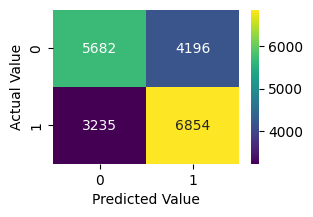

In [164]:
# Confusion Matrix
mat_xgbtune = confusion_matrix(y_val,y_pred_xgbtune)
plt.figure(figsize=(3,2))
sns.heatmap(mat_xgbtune, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Correctly predicted data points : **12536** out of 19967

In [165]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train_trans, label=y_train)
# Define hyperparameters for LightGBM
params = {
    'objective': 'binary', 'metric': 'binary_logloss','boosting_type': 'gbdt',
    'num_leaves': 30, 'learning_rate': 0.1, 'feature_fraction': 0.9,
    'bagging_fraction': 0.8, 'bagging_freq': 5, 'seed': 42 
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Info] Number of positive: 40354, number of negative: 39514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4258
[LightGBM] [Info] Number of data points in the train set: 79868, number of used features: 146
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505259 -> initscore=0.021035
[LightGBM] [Info] Start training from score 0.021035


In [166]:
# LightGBM Model Accuracy
y_val_pred_prob = lgb_model.predict(X_val_trans)
y_pred_lgb = (y_val_pred_prob>0.5).astype(int)
accuracy = accuracy_score(y_val,y_pred_lgb)
print(f"{round(accuracy*100,2)} % of data points are correctly classified by LighGBM model ")

62.83 % of data points are correctly classified by LighGBM model 


In [167]:
# Classification Report
lgb_report = classification_report(y_val,y_pred_lgb)
print(f"Classification Report of LightGBM")
print(lgb_report)

Classification Report of LightGBM
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9878
           1       0.62      0.67      0.64     10089

    accuracy                           0.63     19967
   macro avg       0.63      0.63      0.63     19967
weighted avg       0.63      0.63      0.63     19967



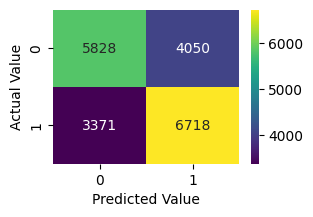

In [168]:
# Confusion Matrix
mat_lgb = confusion_matrix(y_val,y_pred_lgb)
plt.figure(figsize=(3,2))
sns.heatmap(mat_lgb, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Correctly classified data points : **12,546** out of 19967

In [169]:
# Tunning hyperparameters for LighGBM model
param_dist = {
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'feature_fraction': [0.8,0.9],
    'bagging_fraction': [0.75,0.8],
    'bagging_freq': [4,5],
    'boosting_type' : ['gbdt'],
    'num_leaves' : [30, 62, 126],
    'learning_rate' : [0.01,0.1,0.5],
}

lgb_clf = lgb.LGBMClassifier()
lgb_tune = RandomizedSearchCV(lgb_clf,param_dist,cv=3,verbose=1,
                              n_jobs=-1,random_state=21,n_iter=24)
lgb_tune.fit(X_train_trans,y_train,eval_set=[(X_val_trans,y_val)])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 40354, number of negative: 39514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And 

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=24, n_jobs=-1,
                   param_distributions={'bagging_fraction': [0.75, 0.8],
                                        'bagging_freq': [4, 5],
                                        'boosting_type': ['gbdt'],
                                        'feature_fraction': [0.8, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.5],
                                        'metric': ['binary_logloss'],
                                        'num_leaves': [30, 62, 126],
                                        'objective': ['binary']},
                   random_state=21, verbose=1)

In [170]:
# Best training accuracy score after tunning
lgb_tune.best_score_

0.6240672574972349

In [171]:
# Accuracy on validation set
accuracy = lgb_tune.score(X_val_trans,y_val)
print(f"LightGBM accuracy : {accuracy*100:.2f} %")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
LightGBM accuracy : 63.01 %


In [172]:
# Classification Report
y_pred_lgbtune = lgb_tune.predict(X_val_trans)
lgbtune_report = classification_report(y_val,y_pred_lgbtune)
print(f"Classification Report of LightGBM after hyperparameter tunning")
print(lgbtune_report)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Classification Report of LightGBM after hyperparameter tunning
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9878
           1       0.63      0.67      0.65     10089

    accuracy                           0.63     19967
   macro avg       0.63      0.63      0.63     19967
weighted avg       0.63      0.63      0.63     19967



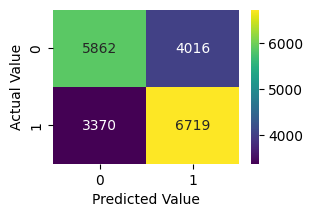

In [173]:
# Confusion Matrix
mat_lgbtune = confusion_matrix(y_val,y_pred_lgbtune)
plt.figure(figsize=(3,2))
sns.heatmap(mat_lgbtune, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Correctly classified samples : **12581** out of 19967

### Prediction on  test dataset

In [174]:
y_test_pred = xgb_model.predict(X_test_trans)

In [175]:
submission = pd.DataFrame({'id':np.arange(X_test.shape[0]),
                                  'target':y_test_pred})

In [176]:
submission.to_csv('submission.csv',index=False)